In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [2]:
unique, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique, counts))}")
unique, counts = np.unique(y_test, return_counts=True)
print(f"Test labels: {dict(zip(unique, counts))}")

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


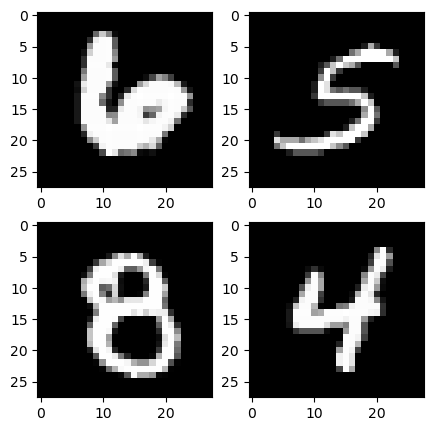

In [3]:
# 4개의 임의표본 추출하기
indices = np.random.randint(0, x_train.shape[0], size=4)
images = x_train[indices]
labels = y_train[indices]

plt.figure(figsize=(5, 5))

for i in range(len(indices)):
    plt.subplot(2, 2, i + 1)
    image = images[i]
    plt.imshow(image, cmap="gray")
    plt.grid(False)
plt.show()

In [4]:
# pre-processing
from tensorflow.keras.utils import to_categorical

num_features = x_train.shape[1] * x_train.shape[2] # 784

x_train = x_train.reshape(-1, num_features).astype('float32')
x_test = x_test.reshape(-1, num_features).astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
num_classes = y_train.shape[1]

(60000, 10)


In [5]:
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, input_dim=(num_features)))
model.add(Activation('relu'))
model.add(Dropout(0.45))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [6]:
# validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    partial_x_train, partial_y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

history_out = history.history
history_out.keys()

Epoch 1/10
 46/782 [>.............................] - ETA: 0s - loss: 1.1440 - accuracy: 0.6454  

2024-09-30 14:25:16.339846: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


782/782 [==============================] - 1s 1ms/step - loss: 0.3299 - accuracy: 0.8987 - val_loss: 0.1499 - val_accuracy: 0.9546
Epoch 2/10
782/782 [==============================] - 1s 1ms/step - loss: 0.1643 - accuracy: 0.9507 - val_loss: 0.1079 - val_accuracy: 0.9674
Epoch 3/10
782/782 [==============================] - 1s 1ms/step - loss: 0.1291 - accuracy: 0.9597 - val_loss: 0.0920 - val_accuracy: 0.9727
Epoch 4/10
782/782 [==============================] - 1s 1ms/step - loss: 0.1104 - accuracy: 0.9647 - val_loss: 0.0899 - val_accuracy: 0.9734
Epoch 5/10
782/782 [==============================] - 1s 1ms/step - loss: 0.0992 - accuracy: 0.9684 - val_loss: 0.0774 - val_accuracy: 0.9773
Epoch 6/10
782/782 [==============================] - 1s 1ms/step - loss: 0.0865 - accuracy: 0.9723 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 7/10
782/782 [==============================] - 1s 1ms/step - loss: 0.0802 - accuracy: 0.9746 - val_loss: 0.0787 - val_accuracy: 0.9761
Epoch 8/10
782/78

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

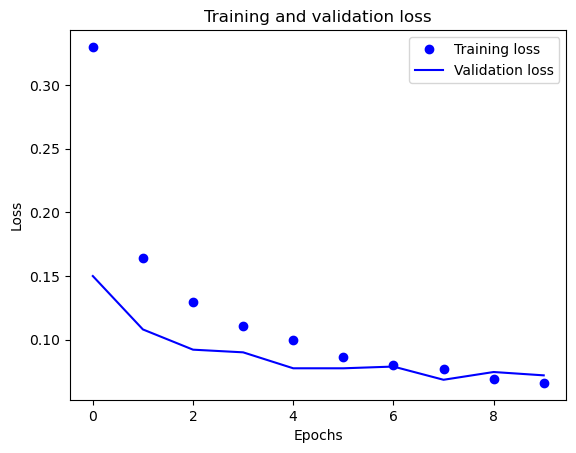

In [8]:
loss = history_out['loss']
val_loss = history_out['val_loss']
accuracy = history_out['accuracy']
val_accuracy = history_out['val_accuracy']

plt.plot(loss, 'bo', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

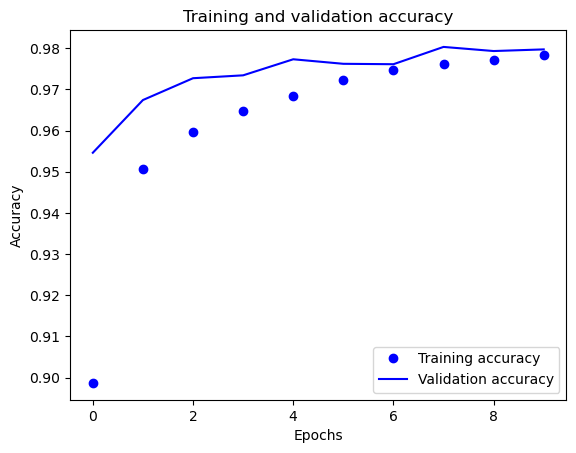

In [9]:
plt.clf() # clf method가 적용된 그래프의 figure를 지운다
plt.plot(accuracy, 'bo', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model.fit(
    x_train, y_train,
    epochs=40,
    batch_size=64,
)

Epoch 1/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 2/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 3/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0294 - accuracy: 0.9907
Epoch 4/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0315 - accuracy: 0.9896
Epoch 5/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0295 - accuracy: 0.9908
Epoch 6/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0267 - accuracy: 0.9918
Epoch 7/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 8/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0260 - accuracy: 0.9914
Epoch 9/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0271 - accuracy: 0.9911
Epoch 10/40
938/938 [==============================] - 1s 1ms/step - loss: 0.0263 - accuracy: 0.9912

In [13]:
train_results = model.evaluate(x_train, y_train, verbose=2)
test_results = model.evaluate(x_test, y_test, verbose=2)

print(train_results)
print(test_results)

1875/1875 - 1s - loss: 0.0018 - accuracy: 0.9995 - 720ms/epoch - 384us/step
313/313 - 0s - loss: 0.0834 - accuracy: 0.9834 - 114ms/epoch - 365us/step
[0.0017550326883792877, 0.9995166659355164]
[0.08341293036937714, 0.9833999872207642]


In [14]:
import pandas as pd

pred = model.predict(x_test)
pred = pd.DataFrame(pred)
pred.head()

313/313 [==============================] - 0s 374us/step


,0,1,2,3,4,5,6,7,8,9
0,4.627531e-13,7.627349e-11,4.364082e-11,2.368184e-11,6.824012e-09,2.885790e-16,5.550103e-17,1.000000e+00,3.432798e-15,6.963277e-09
1,5.879857e-18,6.950018e-10,1.000000e+00,1.326391e-17,7.350449e-17,9.514832e-18,7.049819e-17,5.231207e-19,3.085626e-15,3.238225e-24
2,3.959886e-11,1.000000e+00,3.857102e-12,8.245347e-16,7.675488e-09,1.621021e-13,3.128658e-11,2.209225e-09,8.235058e-11,5.263324e-15
3,1.000000e+00,2.116829e-24,2.189038e-16,2.490744e-17,6.065613e-14,1.747031e-16,3.718273e-11,1.758794e-16,4.288755e-17,1.768202e-12
4,1.995198e-12,3.452218e-15,1.190652e-10,1.963707e-12,9.999994e-01,1.760535e-12,2.524437e-13,3.782614e-11,6.653360e-15,5.597437e-07


## Functional API

In [15]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

x = Input(shape=(num_features,))
h1 = Dense(256, activation='relu')(x)
h1 = Dropout(0.45)(h1)
h2 = Dense(256, activation='relu')(h1)
out = Dense(num_classes, activation='softmax')(h2)
model = Model(inputs=x, outputs=out)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=35, batch_size=64)

Epoch 1/35
938/938 [==============================] - 1s 1ms/step - loss: 0.3059 - accuracy: 0.9082
Epoch 2/35
938/938 [==============================] - 1s 1ms/step - loss: 0.1575 - accuracy: 0.9519
Epoch 3/35
938/938 [==============================] - 1s 1ms/step - loss: 0.1248 - accuracy: 0.9615
Epoch 4/35
938/938 [==============================] - 1s 1ms/step - loss: 0.1072 - accuracy: 0.9659
Epoch 5/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0954 - accuracy: 0.9699
Epoch 6/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0864 - accuracy: 0.9726
Epoch 7/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.9746
Epoch 8/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0755 - accuracy: 0.9759
Epoch 9/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0687 - accuracy: 0.9777
Epoch 10/35
938/938 [==============================] - 1s 1ms/step - loss: 0.0642 - accuracy: 0.9791